In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Kobe Bryant  shot selection

Cсылка на соревнование: https://www.kaggle.com/c/kobe-bryant-shot-selection

Goal: Fun and education

Using 20 years of data on Kobe's swishes and misses, can you predict which shots will find the bottom of the net? This competition is well suited for practicing classification basics, feature engineering, and time series analysis. Practice got Kobe an eight-figure contract and 5 championship rings. What will it get you?

This data contains the location and circumstances of every field goal attempted by Kobe Bryant took during his 20-year career. Your task is to predict whether the basket went in (shot_made_flag).

We have removed 5000 of the shot_made_flags (represented as missing values in the csv file). These are the test set shots for which you must submit a prediction. You are provided a sample submission file with the correct shot_ids needed for a valid prediction.

In [199]:
data = pd.read_csv('data/Kobe.csv')

Посмотрим общую информацию о данных

In [200]:
data.shape

(30697, 25)

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

In [202]:
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [203]:
data.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


In [204]:
random = data.take(np.random.permutation(len(data))[:7])
random.T

,27349,5121,9693,15692,3606,6834,23586
action_type,Jump Shot,Jump Shot,Driving Layup Shot,Jump Shot,Jump Shot,Slam Dunk Shot,Jump Shot
combined_shot_type,Jump Shot,Jump Shot,Layup,Jump Shot,Jump Shot,Dunk,Jump Shot
game_event_id,178,17,213,231,490,143,336
game_id,40300153,20300091,20501229,20900527,20200292,20400461,29700322
lat,33.9583,33.8633,34.0443,33.8363,34.0223,34.0443,33.9743
loc_x,-107,-21,0,-119,34,0,229
loc_y,86,181,0,208,22,0,70
lon,-118.377,-118.291,-118.27,-118.389,-118.236,-118.27,-118.041
minutes_remaining,3,9,2,11,1,9,2
period,2,1,2,3,4,2,3


In [205]:
data['unite']=data['shot_type']+data['shot_zone_range']
data['unite'].value_counts()

2PT Field GoalLess Than 8 ft.    9397
2PT Field Goal16-24 ft.          8245
2PT Field Goal8-16 ft.           6625
3PT Field Goal24+ ft.            6272
3PT Field GoalBack Court Shot      82
3PT Field Goal16-24 ft.            70
2PT Field Goal24+ ft.               3
3PT Field GoalLess Than 8 ft.       1
3PT Field Goal8-16 ft.              1
2PT Field GoalBack Court Shot       1
Name: unite, dtype: int64

In [206]:
data.team_name.value_counts()

Los Angeles Lakers    30697
Name: team_name, dtype: int64

In [207]:
data.team_id.value_counts()

1610612747    30697
Name: team_id, dtype: int64

In [208]:
data.shot_type.value_counts()

2PT Field Goal    24271
3PT Field Goal     6426
Name: shot_type, dtype: int64

Название и ID команды можно убрать, т.к. значения в них одинаковые))), 
Matchup и Opponent это дублирующие столбцы, 
shot_id ни о чем не говорит
shot_type тоже дублирующий столбец для shot_zone_range (3 очка дают за бросок с 24+)

In [209]:
data=data.drop(['matchup','team_id','team_name','shot_id','shot_type','unite'],axis=1)


Back Court Shot в shot_zone_range меняем на 24+ ft.

In [210]:
data['shot_zone_range'] = data['shot_zone_range'].str.replace('Back Court Shot','24+ ft.')
data['shot_zone_range'].value_counts()

Less Than 8 ft.    9398
16-24 ft.          8315
8-16 ft.           6626
24+ ft.            6358
Name: shot_zone_range, dtype: int64

In [211]:
data['shot_made_flag'].value_counts(dropna=False)

 0.0    14232
 1.0    11465
NaN      5000
Name: shot_made_flag, dtype: int64

Пропущенные значения меняем на нулевые

In [212]:
data.shot_made_flag = data.shot_made_flag.fillna(value = 0)
data['shot_made_flag'].value_counts(dropna=False)

0.0    19232
1.0    11465
Name: shot_made_flag, dtype: int64

In [213]:
data[['lat','lon','loc_x','loc_y']].corr()

,lat,lon,loc_x,loc_y
lat,1.000000,0.016217,0.016217,-1.000000
lon,0.016217,1.000000,1.000000,-0.016217
loc_x,0.016217,1.000000,1.000000,-0.016217
loc_y,-1.000000,-0.016217,-0.016217,1.000000


Убираем lat и lon, т.к. они полностью коррелируются с loc_x и loc_y
убираем game_event_id, game_id т.к. они ни о чем не говорят
убираем shot_distance, т.к. значение этого столбца обобщено в shot_zone_range 
Объединим 2 столбца seconds_remaining и  minutes_remaining в один и разобьем время по 60 сек
Убираем season, вместо game_date будет 3 столбца месяц, год и день недели



In [214]:
data['seconds_remaining'] = data['minutes_remaining'] * 60 + data['seconds_remaining']

In [215]:
data['game_date'] = pd.to_datetime(data['game_date'])
data['game_year'] = data['game_date'].dt.year
data['game_month'] = data['game_date'].dt.month
data['game_day'] = data['game_date'].dt.dayofweek

In [216]:
data=data.drop(['game_event_id','lat','lon','game_id','shot_distance','minutes_remaining','game_date','game_date'],axis=1)


In [217]:
del data['season']

In [218]:
data.head()

,action_type,combined_shot_type,loc_x,loc_y,period,playoffs,seconds_remaining,shot_made_flag,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,game_year,game_month,game_day
0,Jump Shot,Jump Shot,167,72,1,0,627,0.0,Right Side(R),Mid-Range,16-24 ft.,POR,2000,10,1
1,Jump Shot,Jump Shot,-157,0,1,0,622,0.0,Left Side(L),Mid-Range,8-16 ft.,POR,2000,10,1
2,Jump Shot,Jump Shot,-101,135,1,0,465,1.0,Left Side Center(LC),Mid-Range,16-24 ft.,POR,2000,10,1
3,Jump Shot,Jump Shot,138,175,1,0,412,0.0,Right Side Center(RC),Mid-Range,16-24 ft.,POR,2000,10,1
4,Driving Dunk Shot,Dunk,0,0,2,0,379,1.0,Center(C),Restricted Area,Less Than 8 ft.,POR,2000,10,1


In [219]:
data['shot_zone_area'].value_counts()


Center(C)                13455
Right Side Center(RC)     4776
Right Side(R)             4588
Left Side Center(LC)      4044
Left Side(L)              3751
Back Court(BC)              83
Name: shot_zone_area, dtype: int64

In [220]:
data['shot_zone_basic'].value_counts()

Mid-Range                12625
Restricted Area           7136
Above the Break 3         5620
In The Paint (Non-RA)     4578
Right Corner 3             387
Left Corner 3              280
Backcourt                   71
Name: shot_zone_basic, dtype: int64

In [221]:
data['combined_shot_type'].value_counts()

Jump Shot    23485
Layup         5448
Dunk          1286
Tip Shot       184
Hook Shot      153
Bank Shot      141
Name: combined_shot_type, dtype: int64

In [222]:
data['action_type'].value_counts()

Jump Shot                             18880
Layup Shot                             2567
Driving Layup Shot                     1978
Turnaround Jump Shot                   1057
Fadeaway Jump Shot                     1048
Running Jump Shot                       926
Pullup Jump shot                        476
Turnaround Fadeaway shot                439
Slam Dunk Shot                          411
Reverse Layup Shot                      395
Jump Bank Shot                          333
Driving Dunk Shot                       310
Dunk Shot                               262
Tip Shot                                182
Alley Oop Dunk Shot                     122
Step Back Jump shot                     118
Floating Jump shot                      114
Driving Reverse Layup Shot               97
Hook Shot                                84
Driving Finger Roll Shot                 82
Alley Oop Layup shot                     80
Reverse Dunk Shot                        75
Running Layup Shot              

In [223]:
data['game_year'].value_counts()

2009    2357
2002    2215
2012    2184
2008    2141
2006    2122
2000    2047
2010    2009
2003    1961
2007    1936
2004    1779
2001    1662
2005    1515
2011    1275
1999    1182
2013    1020
1997     760
2014     626
1998     619
2016     614
2015     586
1996      87
Name: game_year, dtype: int64

In [224]:
data2009=data[data['game_year']==2009]

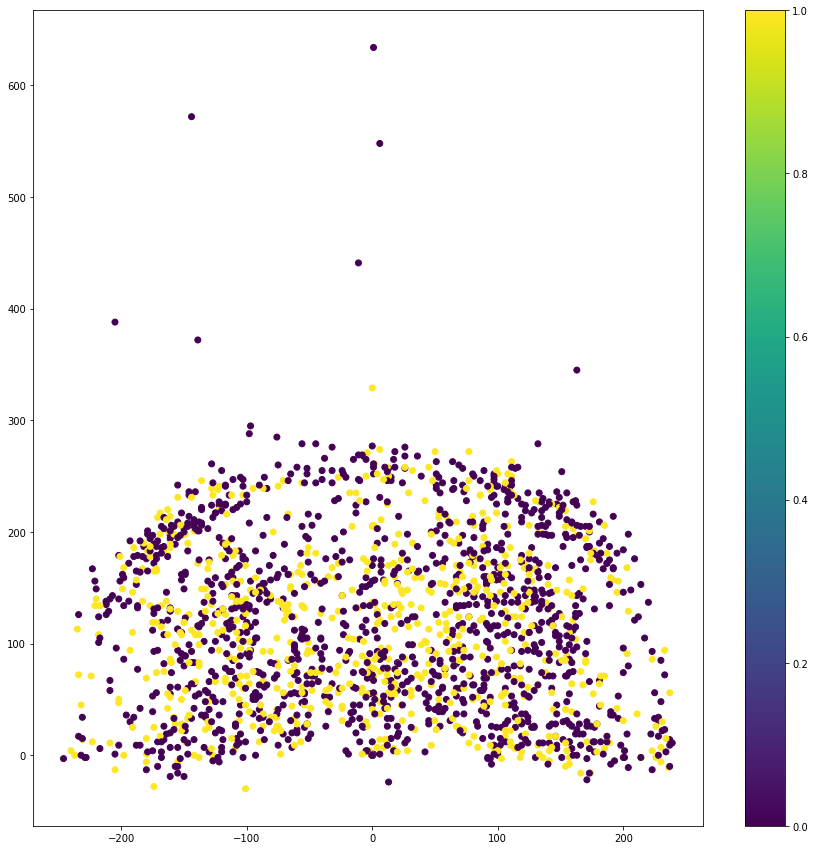

In [225]:
x=data2009['loc_x']
y=data2009['loc_y']
plt.figure(figsize=(15,15))
plt.scatter(x,y,c=data2009['shot_made_flag'])

cbar = plt.colorbar()
plt.show()

Столбцы loc_x и loc_y дают всю информацию о том откуда произведен бросок. Поэтому shot_zone_range, shot_zone_basic, shot_zone_area можно убрать

In [226]:
data=data.drop(['shot_zone_range', 'shot_zone_basic', 'shot_zone_area'],axis=1)


In [227]:
data.head()

,action_type,combined_shot_type,loc_x,loc_y,period,playoffs,seconds_remaining,shot_made_flag,opponent,game_year,game_month,game_day
0,Jump Shot,Jump Shot,167,72,1,0,627,0.0,POR,2000,10,1
1,Jump Shot,Jump Shot,-157,0,1,0,622,0.0,POR,2000,10,1
2,Jump Shot,Jump Shot,-101,135,1,0,465,1.0,POR,2000,10,1
3,Jump Shot,Jump Shot,138,175,1,0,412,0.0,POR,2000,10,1
4,Driving Dunk Shot,Dunk,0,0,2,0,379,1.0,POR,2000,10,1


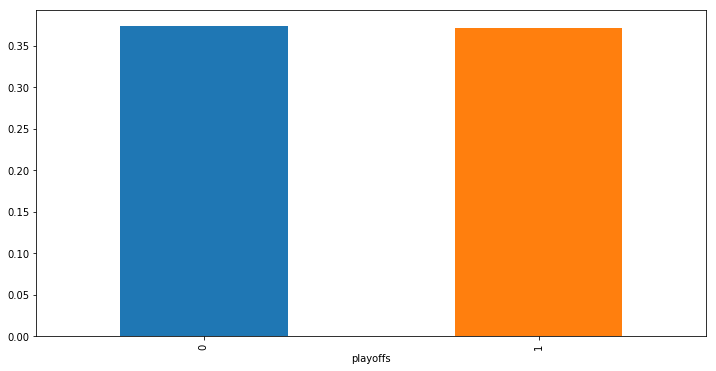

In [228]:
data['shot_made_flag'].groupby(data['playoffs']).mean().plot(kind='bar', figsize=(12, 6))


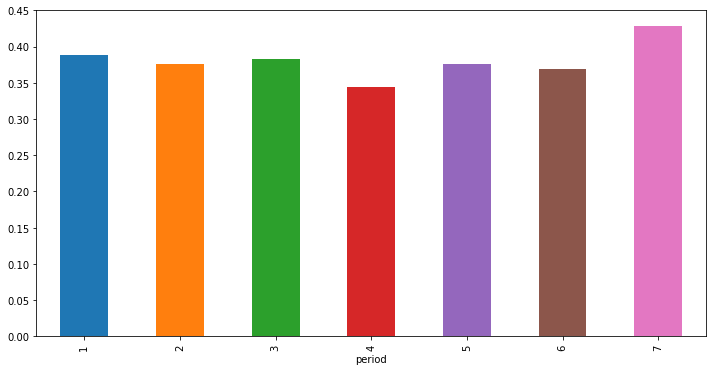

In [229]:
data['shot_made_flag'].groupby(data['period']).mean().plot(kind='bar', figsize=(12, 6))



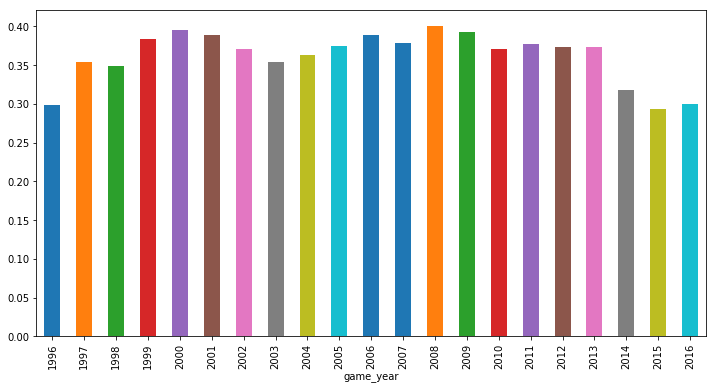

In [230]:
data['shot_made_flag'].groupby(data['game_year']).mean().plot(kind='bar', figsize=(12, 6))

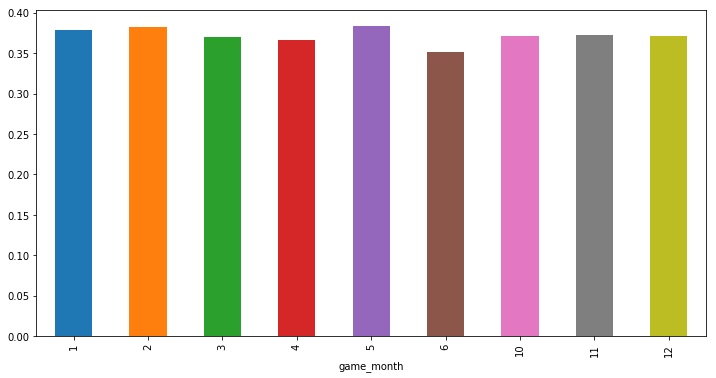

In [231]:
data['shot_made_flag'].groupby(data['game_month']).mean().plot(kind='bar', figsize=(12, 6))

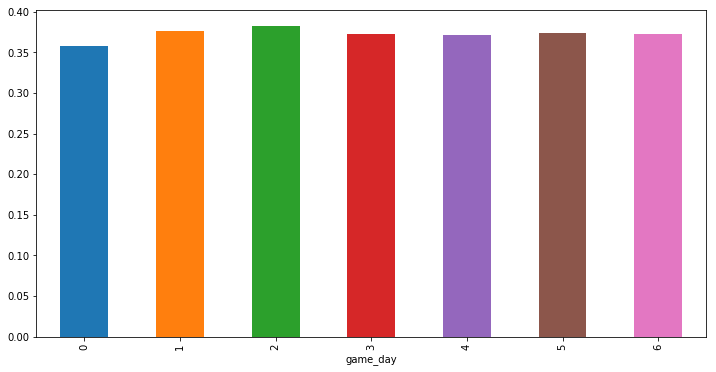

In [232]:
data['shot_made_flag'].groupby(data['game_day']).mean().plot(kind='bar', figsize=(12, 6))

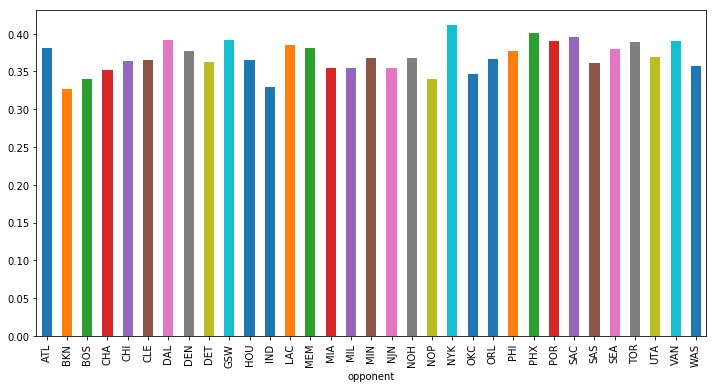

In [233]:
data['shot_made_flag'].groupby(data['opponent']).mean().plot(kind='bar', figsize=(12, 6))

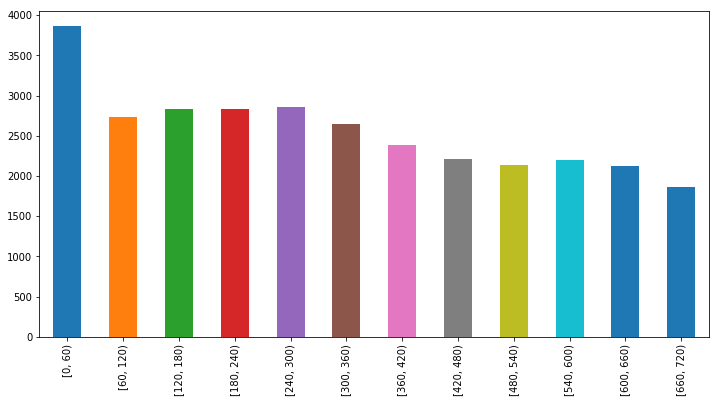

In [234]:
bins = np.append(np.arange(0, 720, 60), 720) 
dic = pd.cut(data['seconds_remaining'], bins, right=False)
time = data.loc[:, ['seconds_remaining', 'shot_made_flag']]
time['dic'] = dic
dic.value_counts(sort=False).plot(kind='bar', figsize=(12, 6))


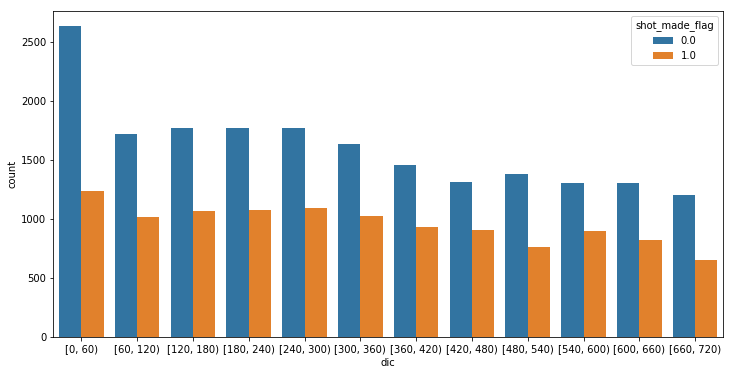

In [235]:
plt.figure(figsize=(12,6))
sns.countplot(x='dic', hue='shot_made_flag', data=time)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000191AF7F4048>,
      dtype=object)

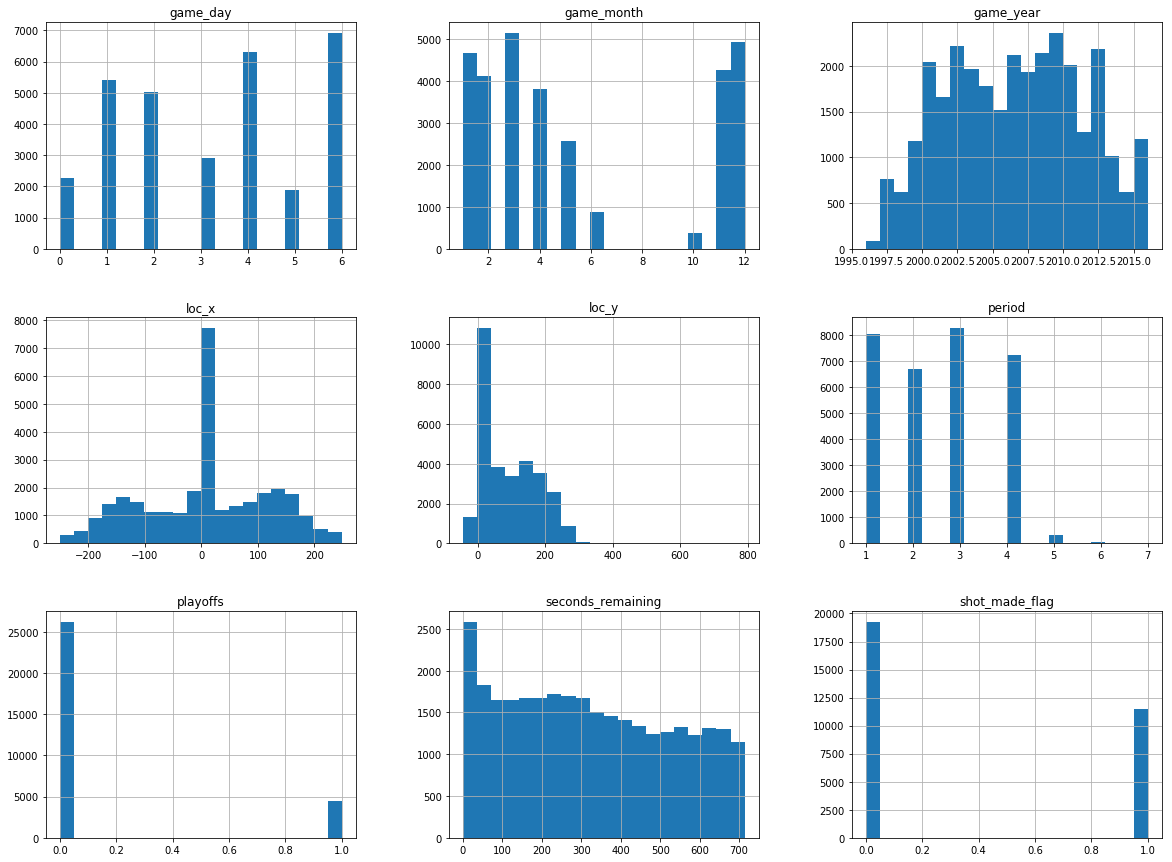

In [236]:
data.hist(bins = 20, figsize=(20,15))

Таким образом лишние столбцы playoffs game_day game_day, т.к. влияния на попадание они не оказывают

In [237]:
data=data.drop(['playoffs', 'game_day', 'game_month'],axis=1)

combined_shot_type повторяется в action_type, тоже удалим этот столбец, а в action_type сократим количество значений

In [239]:
a=(pd.value_counts(data['action_type'])/pd.value_counts(data['action_type']).sum()*100).lt(1)
data['action_type'] = np.where(data['action_type'].isin(pd.value_counts(data['action_type'])[a].index),'Other',data['action_type'])
(pd.value_counts(data['action_type'])/pd.value_counts(data['action_type']).sum()*100)

Jump Shot                   61.504382
Layup Shot                   8.362381
Driving Layup Shot           6.443626
Other                        6.114604
Turnaround Jump Shot         3.443333
Fadeaway Jump Shot           3.414014
Running Jump Shot            3.016581
Pullup Jump shot             1.550640
Turnaround Fadeaway shot     1.430107
Slam Dunk Shot               1.338893
Reverse Layup Shot           1.286771
Jump Bank Shot               1.084797
Driving Dunk Shot            1.009871
Name: action_type, dtype: float64

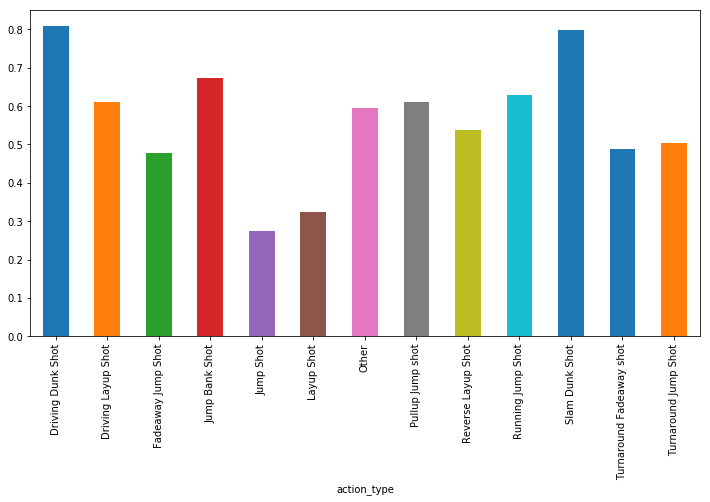

In [240]:
data['shot_made_flag'].groupby(data['action_type']).mean().plot(kind='bar', figsize=(12, 6))

In [242]:
del data['combined_shot_type']

In [243]:
data.head()

,action_type,loc_x,loc_y,period,seconds_remaining,shot_made_flag,opponent,game_year
0,Jump Shot,167,72,1,627,0.0,POR,2000
1,Jump Shot,-157,0,1,622,0.0,POR,2000
2,Jump Shot,-101,135,1,465,1.0,POR,2000
3,Jump Shot,138,175,1,412,0.0,POR,2000
4,Driving Dunk Shot,0,0,2,379,1.0,POR,2000


In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 8 columns):
action_type          30697 non-null object
loc_x                30697 non-null int64
loc_y                30697 non-null int64
period               30697 non-null int64
seconds_remaining    30697 non-null int64
shot_made_flag       30697 non-null float64
opponent             30697 non-null object
game_year            30697 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 1.9+ MB


обрабатываем категориальные признаки

In [245]:
def get_one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

In [294]:
list=data.columns.tolist()
cat_cols=[list[0]]+list[-2:]+[list[3]]


In [295]:
data1=get_one_hot(data,cat_cols)

In [296]:
data1=data1.drop(cat_cols,axis=1)

In [297]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso


In [298]:
x = data1.loc[:, data1.columns != 'shot_made_flag'].values
y = data1['shot_made_flag']

In [299]:
lm = LinearRegression().fit(x, y)
print(lm.intercept_)
print(lm.coef_)

573799242.1803215
[ 4.59943863e-05  7.84787228e-05  5.69199062e-05 -6.77026180e+08
 -6.77026180e+08 -6.77026180e+08 -6.77026180e+08 -6.77026180e+08
 -6.77026180e+08 -6.77026180e+08 -6.77026180e+08 -6.77026180e+08
 -6.77026180e+08 -6.77026180e+08 -6.77026180e+08 -6.77026180e+08
 -1.05036640e+07 -1.05036640e+07 -1.05036640e+07 -1.05036640e+07
 -1.05036640e+07 -1.05036640e+07 -1.05036640e+07 -1.05036640e+07
 -1.05036640e+07 -1.05036640e+07 -1.05036640e+07 -1.05036640e+07
 -1.05036640e+07 -1.05036640e+07 -1.05036640e+07 -1.05036640e+07
 -1.05036640e+07 -1.05036640e+07 -1.05036640e+07 -1.05036640e+07
 -1.05036639e+07 -1.05036640e+07 -1.05036640e+07 -1.05036640e+07
 -1.05036639e+07 -1.05036640e+07 -1.05036639e+07 -1.05036640e+07
 -1.05036640e+07 -1.05036640e+07 -1.05036640e+07 -1.05036639e+07
 -1.05036640e+07  3.28713998e+07  3.28713998e+07  3.28713998e+07
  3.28713998e+07  3.28713998e+07  3.28713998e+07  3.28713998e+07
  3.28713998e+07  3.28713998e+07  3.28713998e+07  3.28713998e+07
  3.287

In [300]:
rg = Ridge(alpha=1000).fit(x, y)
print(rg.intercept_)
print(rg.coef_)

0.49514880392914856
[ 3.07570411e-05 -5.54734608e-05  5.28453247e-05  6.81722901e-02
  6.07113214e-02 -1.65546590e-02  3.91205434e-02 -2.25586071e-01
 -1.40679555e-01  5.08396804e-02  3.67046981e-02  4.12636662e-03
  5.42812224e-02  8.09200354e-02 -5.37860446e-03 -6.67726817e-03
 -4.25973406e-04 -4.42546929e-03 -1.24998582e-02 -3.47935899e-03
  6.93629822e-04 -2.28794743e-03  8.49657899e-03  8.53499747e-04
 -2.34201374e-03 -2.14553179e-04 -1.02413992e-02 -1.33366018e-02
  3.15681415e-03  5.57286566e-04 -5.40613506e-03 -1.45680177e-04
 -2.21151273e-04 -1.22487946e-02  9.97341942e-04 -1.90355797e-03
  1.83302290e-02 -1.66844180e-02 -3.69242714e-03  2.57624709e-03
  2.32018112e-02  6.01287410e-03  1.74493483e-02 -3.62561075e-03
  8.48332750e-03 -4.68087663e-03  3.00437813e-03  3.79534587e-03
  2.53114532e-04 -2.89401336e-03 -4.56731374e-03 -1.37043652e-02
  7.70329174e-03  2.01244525e-02  1.10792464e-02  3.38066626e-04
 -3.55978655e-03 -4.82780208e-03  8.02913516e-03  2.35617751e-02
  1.4

In [301]:
rg = Lasso().fit(x, y)
print(rg.intercept_)
print(rg.coef_)

0.41823011780564645
[-0.00000000e+00 -5.64026088e-04  2.06722319e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.0

In [302]:
import statsmodels.formula.api as smf


In [309]:
est = smf.OLS(y,x,).fit()
est_res = est.summary()
est_res.tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
x1,4.599e-05,2.39e-05,1.921,0.055,-9.4e-07,9.29e-05
x2,7.848e-05,3.74e-05,2.096,0.036,5.08e-06,0.000
x3,5.692e-05,1.29e-05,4.425,0.000,3.17e-05,8.21e-05
x4,0.3776,0.026,14.600,0.000,0.327,0.428
x5,0.1831,0.013,14.395,0.000,0.158,0.208
x6,0.0514,0.016,3.261,0.001,0.021,0.082
x7,0.2395,0.025,9.505,0.000,0.190,0.289
x8,-0.1640,0.009,-17.446,0.000,-0.182,-0.146
x9,-0.1065,0.012,-8.997,0.000,-0.130,-0.083
x10,0.1682,0.013,13.236,0.000,0.143,0.193


In [307]:
rss = np.sum(est.resid ** 2)
print("RSS:", rss)
print("R^2:", est.rsquared)

RSS: 6450.493341352057
R^2: 0.10197101130201314


In [4]:
target = 'shot_made_flag'

**Задания:**

1. Провести анализ данных. Много хороших примеров анализа можно посмотреть здесь https://www.kaggle.com/c/kobe-bryant-shot-selection/kernels
2. Подготовить фичи для обучения модели - нагенерить признаков, обработать пропущенные значения, проверить на возможные выбросы, обработать категориальные признаки и др.
3. Обучить линейную модель, Lasso, Ridge на тех же признаках - построить сравнительную таблицу коэффициентов, сделать заключения о том, как меняется величина коэффициентов, какие зануляются. Посчитать RSS

**Дополнительно**
4. Сравнить результаты на тестовом наборе данных - сделать train_test_split в самом начале, подготовить переменные, сравнить результаты работы классификаторов (те же 3), метрика ROC AUC